In [8]:
import hoomd
import hoomd.md
import ex_render

# Introduction to MD simulations

The ``md`` component of HOOMD performs molecular dynamics (MD) simulations. MD simulations solve the equations of motion iteratively to evolve the system state.

In [9]:
hoomd.context.initialize('--mode=cpu')
system = hoomd.init.create_lattice(unitcell=hoomd.lattice.sq(a=1.05), n=10)
d = hoomd.dump.gsd("trajectory.gsd", period=50, group=hoomd.group.all(), overwrite=True)

notice(2): Group "all" created containing 100 particles


## Potential energy

You can define any number of interaction potential energy terms. The canonical example is the Lennard-Jones potential $ V(r) = 4 \varepsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right] $ which is applied between all particles closer than a distance $ r_\mathrm{cut} $.

HOOMD employs neighbor list acceleration structures to compute pair potentials efficiently. First, select the appropriate neighbor list type.

In [10]:
nl = hoomd.md.nlist.cell()

Then, activate the Lennard-Jones (lj) potential and set the paramters. Pair potential commands add the potential to the current simulation context.

In [11]:
lj = hoomd.md.pair.lj(r_cut=3.0, nlist=nl)
lj.pair_coeff.set('A', 'A', epsilon=1.0, sigma=1.0)

## Integration method

The integration method defines the equations of motion for the system. First, select the standard integration mode and supply a step size.

In [12]:
hoomd.md.integrate.mode_standard(dt=0.005)

The standard mode can accept a number of integration methods that each operate on a subset of particles. Most simulations apply a single integration method to all particles. In this case, we choose langevin dynamics.

In [13]:
hoomd.md.integrate.langevin(group=hoomd.group.all(), kT=1.0, seed=2)

notice(2): integrate.langevin/bd is using specified gamma values


## Run the simulation

The ``run`` command steps the integrator forward the given number of steps.

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 100
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:00 | Step 300 / 300 | TPS 15018.8 | ETA 00:00:00
Average TPS: 14746.4
---------
-- Neighborlist stats:
14 normal updates / 4 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 33 / n_neigh_avg: 16.26
shortest rebuild period: 14
-- Cell list stats:
Dimension: 3, 3, 1
n_min    : 9 / n_max: 14 / n_avg: 11.1111
** run complete **
Size: 244.712890625 KiB


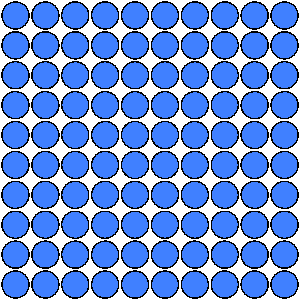

In [14]:
hoomd.run(300)
ex_render.display_movie(ex_render.render_disk_frame, 'trajectory.gsd')